## 2024-08-28 Julie Meeting

Goal: Make some quick plots for animals that are (potentially) being passed on.

## 1. Libraries

In [8]:
import behav_viz.ingest as ingest  # for loading and formatting data from datajoint
import behav_viz.visualize as viz  # for plotting data

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("talk")

## 2. Load Data

In [92]:
animals_with_potential = [
    "R040",
    "R041",
    "R042",
    "R043",
    "R045",
    "R046",
    "R049",
    "R051",
    "R054",
    "R055",
    "R057",
]

In [93]:
experiment_start = "2024-07-20"
trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animals_with_potential, date_min=experiment_start
)  # <- pulls from Sessions.protocol data, trial by trial info

two_weeks_ago = (
    (pd.Timestamp("today") - pd.Timedelta(weeks=2)).date().strftime("%Y-%m-%d")
)
days_df = ingest.create_days_df.create_days_df_from_dj(
    animals_with_potential, date_min=two_weeks_ago
)  # <- pulls from Sessions, mass, water, day level info

animal_id R040
Fetched 38 dates from Sessions table from 2024-07-20 to 2024-08-26 for R040

animal_id R041
Fetched 38 dates from Sessions table from 2024-07-20 to 2024-08-26 for R041

animal_id R042
Fetched 38 dates from Sessions table from 2024-07-20 to 2024-08-26 for R042

animal_id R043
Fetched 39 dates from Sessions table from 2024-07-20 to 2024-08-26 for R043

animal_id R045
Fetched 37 dates from Sessions table from 2024-07-20 to 2024-08-26 for R045

animal_id R046
Fetched 38 dates from Sessions table from 2024-07-20 to 2024-08-26 for R046

animal_id R049
Fetched 28 dates from Sessions table from 2024-07-29 to 2024-08-26 for R049

animal_id R051
Fetched 31 dates from Sessions table from 2024-07-27 to 2024-08-26 for R051

animal_id R054
Fetched 31 dates from Sessions table from 2024-07-27 to 2024-08-26 for R054

animal_id R055
Fetched 30 dates from Sessions table from 2024-07-27 to 2024-08-26 for R055

animal_id R057
Fetched 31 dates from Sessions table from 2024-07-27 to 2024-08-2

## 3. Plotting

### 3.1 Stage Info

#### 3.1.1. Number of Days Training Total

In [94]:
days_training = (
    trials_df.groupby("animal_id")
    .date.nunique()
    .reset_index()
    .rename(columns={"date": "n_days"})
)
days_training.head()

done_training = trials_df.groupby("animal_id").stage.max().reset_index()
done_training["training_complete"] = done_training.stage == 11
days_training = days_training.merge(done_training, on="animal_id", how="left")

days_training.head()

,animal_id,n_days,stage,training_complete
0,R040,38,11.0,True
1,R041,38,11.0,True
2,R042,38,11.0,True
3,R043,38,11.0,True
4,R045,37,11.0,True


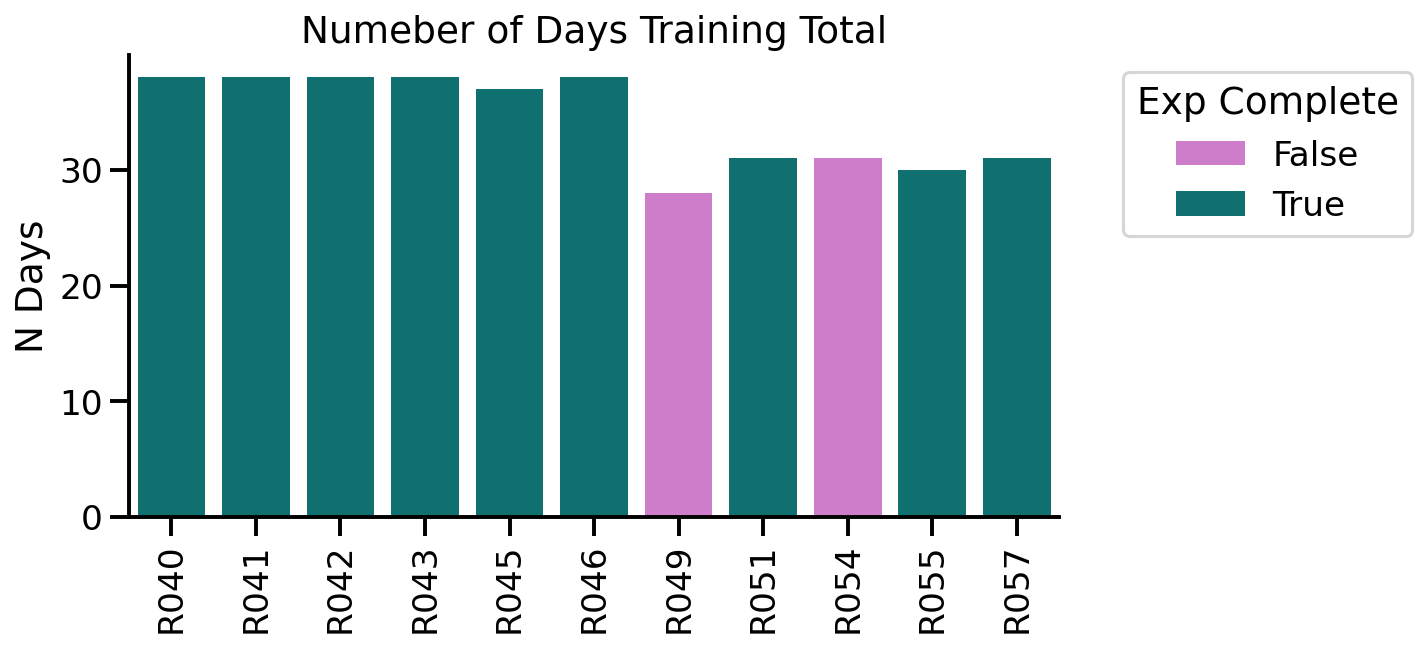

In [103]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
sns.barplot(
    data=days_training,
    x="animal_id",
    y="n_days",
    hue="training_complete",
    palette=["orchid", "teal"],
    ax=ax,
)

_ = ax.set(
    ylabel="N Days",
    xlabel="",
)
ax.tick_params(axis="x", rotation=90)
ax.legend(bbox_to_anchor=(1.05, 1), title="Exp Complete", loc="upper left")
ax.set(title="Numeber of Days Training Total")
sns.despine()


#### 3.1.2. Number of Days in Stage 11

This is the stage they enter once experiment is complete. The animals have a stable fix period during the session and it is randomly chosen overnight from exp(1.2) with min 1 and max 2 seconds. 

[Text(0.5, 1.0, 'Days Since Completing Experiment')]

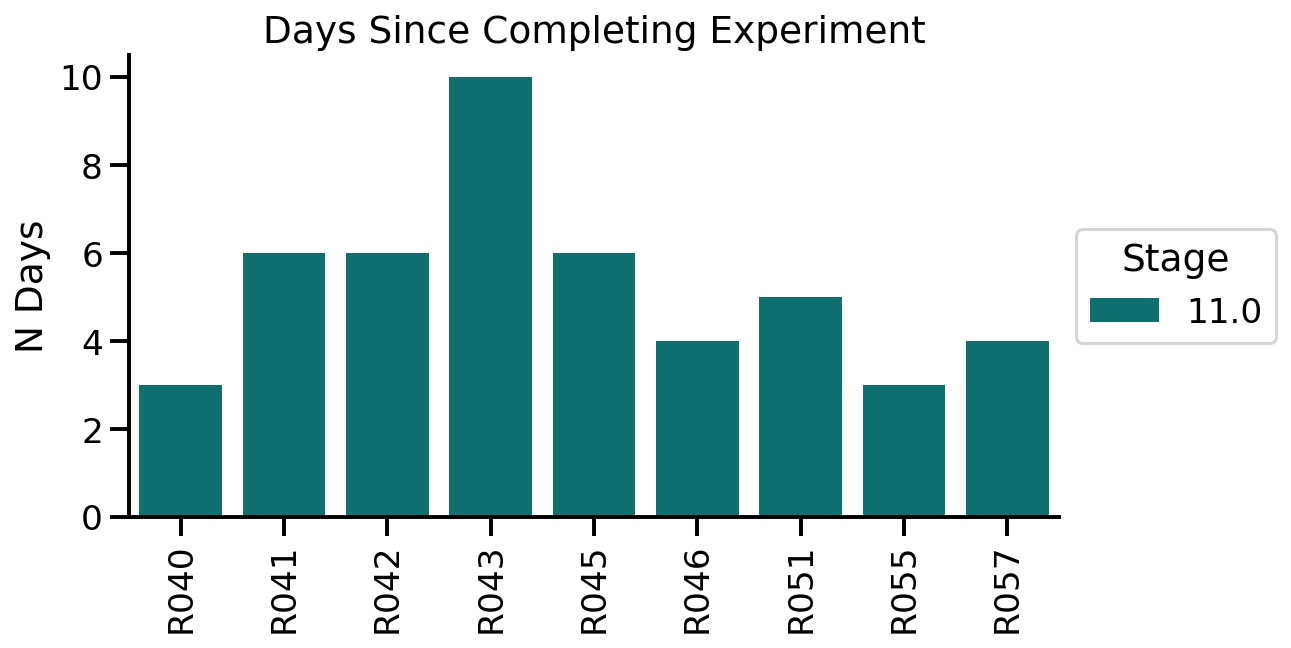

In [99]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
viz.multianimal_plots.plot_ma_days_in_stage_by_animal(
    trials_df, min_stage=11, max_stage=11, ax=ax, palette=["teal"]
)

ax.set(title="Days Since Completing Experiment")

## 3.2 Performance

Looking at animal performance for the last two weeks 

### 3.2.1 Trials

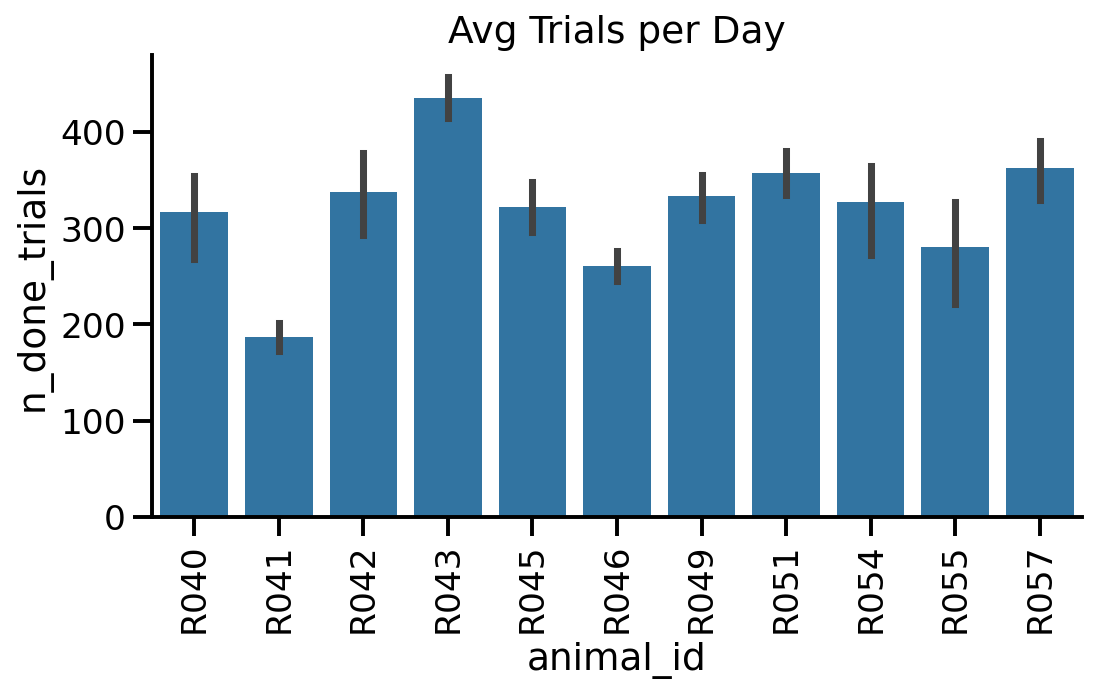

In [104]:
trial_counts = days_df.groupby("animal_id").n_done_trials.mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
sns.barplot(data=days_df, x="animal_id", y="n_done_trials", ax=ax)

ax.tick_params(axis="x", rotation=90)
ax.set(title="Avg Trials per Day")
sns.despine()

### 3.2.2 Violation Rates, Hit Rates, Side Bias (- L, + R)

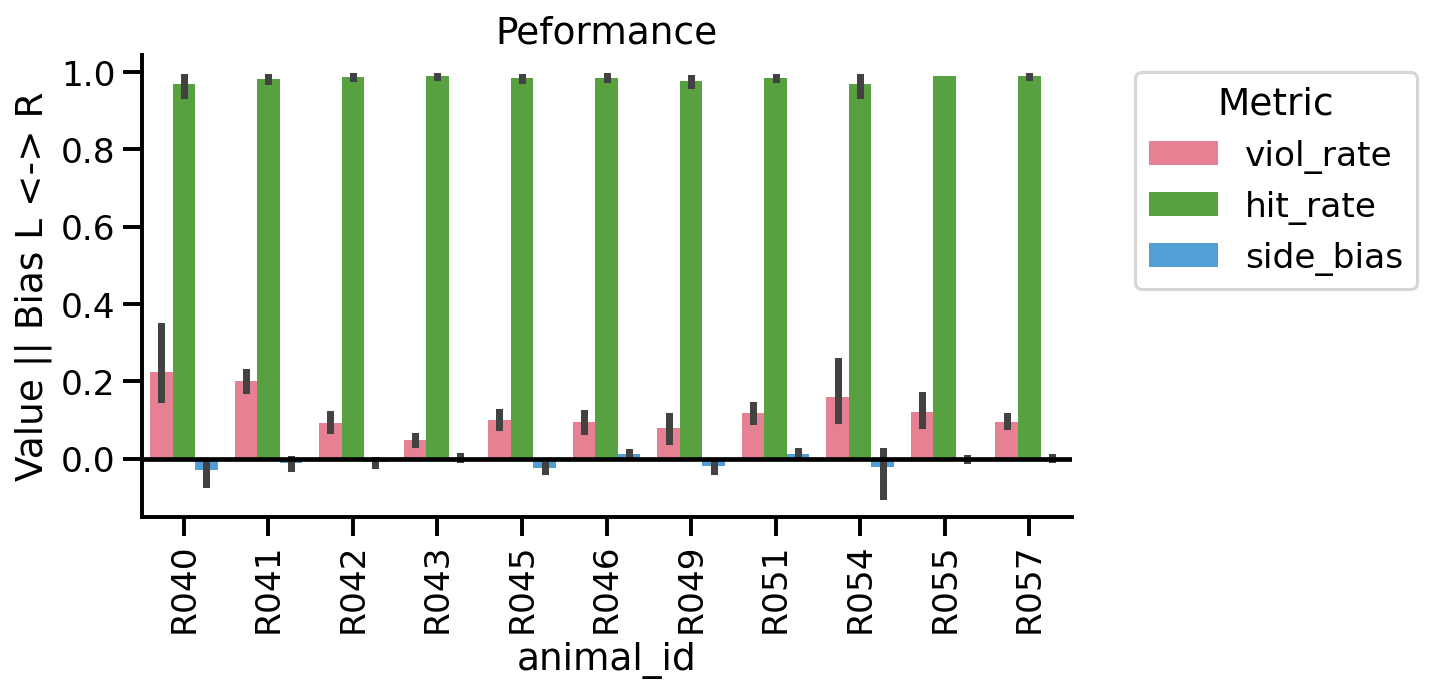

In [98]:
perf_df = pd.melt(
    days_df[["animal_id", "viol_rate", "hit_rate", "side_bias"]],
    id_vars="animal_id",
)

fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
sns.barplot(
    perf_df,
    x="animal_id",
    y="value",
    hue="variable",
    palette="husl",
    ax=ax,
)

ax.axhline(0, color="black")

ax.tick_params(axis="x", rotation=90)
ax.set(title="Peformance", ylabel="Value || Bias L <-> R")
ax.legend(bbox_to_anchor=(1.05, 1), title="Metric", loc="upper left")
sns.despine()